# Пример использования простых методов векторизации на Python

Векторизуем тексты отзывов на банки с сайта banki.ru.


#Задания

##Задание 1
На основе подсчета частоты слов в корпусе проверьте выполнение закона Ципфа путем построения графика зависимости частоты слова от ранга.

##Задание 2
Посмотрите, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud). Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
Исправьте приведенный пример для представления Bag of Words (Мешок слов).
* Создайте словарь частот слов с помощью collections.Counter
* Нарисуйте облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
* Используйте nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

##Задание 3
Постройте векторное представление текстов корпуса на основе метода TF*IDF (TfidfVectorizer). Используйте это представление текстов для обучения классификатора. Сравните его работу по сравнению с классификатором, использоваавшем модель Bag of Words (Мешка слов).


In [1]:
!pip install pymorphy2[fast] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 958.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.1/371.1 KB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for DAWG: filename=DAWG-0.8.0-cp39-cp39-linux_x86_64.whl size=1272156 sha256=3279c8e2359245454ccf242f2806bc5a867b1f349ae4ad982e430f3c671153d3
  Stored in directory: /root/.cache/pip/wheels/ca/92/6b/42b536c832a800acdabe5ad23487a60206c1f46ae5a0a2c76d
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=3fb3877c09bbf188b9d378a579f6f724708e2e441cc0f1b7c5a419eefcdee260
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built DAWG docopt


In [2]:
import pandas as pd
import numpy as np
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Загружаем и готовим набор данных

Загружаем файл с dropbox

In [4]:
!wget https://www.dropbox.com/s/a9r0b2yj3vqvi13/banks.csv?dl=1 -O banks.csv

--2023-03-21 21:41:17--  https://www.dropbox.com/s/a9r0b2yj3vqvi13/banks.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/a9r0b2yj3vqvi13/banks.csv [following]
--2023-03-21 21:41:18--  https://www.dropbox.com/s/dl/a9r0b2yj3vqvi13/banks.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1078d75741a816bb9558ab047.dl.dropboxusercontent.com/cd/0/get/B4s6bTvpc2Er3voihuJC6UVpazezhGg8ec9c6gD4klHkHR-HVGmZJcMzDPzH5giRhch5g9BSn-aHd-OBULWGYa1E7L-YM1mWevc8RFRLS1Pl_BeF5490a8Ee9jMl0BtTYRBkhxH13dHa7BQHQP7oREIHr3Vr49PreyUh7IJjnmnGlQ/file?dl=1# [following]
--2023-03-21 21:41:18--  https://uce1078d75741a816bb9558ab047.dl.dropboxusercontent.com/cd/0/get/B4s6bTvpc2Er3voihuJC6UVpazezhGg8ec9c6gD4klHkHR-HVGmZJcMzDPzH5giRhch5g9BSn-aHd-OBULWG

In [5]:
path=''

Или загружаем файл со своего google-диска (код надо раскомментировать)



In [6]:
# Подключаем Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
# Путь каталогу с данными на Google Drive
#path = "drive/MyDrive/colab_data/"

In [7]:
banks = pd.read_csv(path+'banks.csv', sep='\t', index_col='idx');

Выполняем предобработку текстов

In [8]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [9]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--']
stop_words = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()

In [10]:
banks['Preprocessed_texts'] = banks.apply(lambda row: preprocess(row['Text'], punctuation_marks, stop_words, morph), axis=1)

In [11]:
banks

Score                                               Text  \
idx                                                                  
0      Positive  В Альфа-Банке работает замечательная девушка -...   
1      Negative  Оформляя рассрочку в м. Видео в меге тёплый ст...   
2      Positive  Очень порадовала оперативность работы в банке....   
3      Negative  Имела неосторожность оформить потреб. кредит в...   
4      Negative  Небольшая предыстория: Нашел на сайте MDM банк...   
...         ...                                                ...   
13994  Positive  О высокой надёжности МКБ, порядочности и добро...   
13995  Positive  Обслуживаюсь в офисе на Чернореченской 42а, ка...   
13996  Positive  Попала сегодня в очень неприятную ситуацию. Ре...   
13997  Positive  Добрый день! Давно являюсь клиентом банка Русс...   
13998  Negative  Сначала было все банально. Взял в кредит mp3 п...   

                                      Preprocessed_texts  
idx                                                       
0      [альфа-банк, работать, замечательный, девушка,...  
1      [оформлять, рассрочка, м., видео, мег, тёплый,...  
2      [очень, порадовать, оперативность, работа, бан...  
3      [иметь, неосторожность, оформить, потреба, кре...  
4      [небольшой, предыстория, найти, сайт, mdm, бан...  
...                                                  ...  
13994  [высокий, надёжность, мкб, порядочность, добро...  
13995  [обслуживаться, офис, чернореченский, 42а, физ...  
13996  [попасть, сегодня, очень, неприятный, ситуация...  
13997  [добрый, день, давно, являться, клиент, банк, ...  
13998  [сначала, банально, взять, кредит, mp3, плеер,...  

[13999 rows x 3 columns]

## Определяем частоту слов

In [12]:
from collections import Counter

Тестируем работу Counter

In [13]:
test_counter = Counter(banks['Preprocessed_texts'][0])

In [14]:
test_counter

Counter({'альфа-банк': 2,
         'работать': 1,
         'замечательный': 2,
         'девушка': 2,
         'ильясова': 2,
         'орный': 2,
         'вежливый': 1,
         'отзывчивый': 1,
         'действительно': 1,
         'участвовать': 1,
         'запрос': 1,
         'клиент': 1,
         'приходить': 1,
         'подряд': 1,
         'ровно': 1,
         'день': 3,
         'каждый': 1,
         'помнить': 1,
         'время': 1,
         'мой': 1,
         'приход': 1,
         'помочь': 2,
         'оформить': 1,
         'кредит': 2,
         'размер': 1,
         '1млн': 1,
         'рубль': 1,
         'прийти': 1,
         'партнёр': 1,
         'передавать': 1,
         'получить': 1,
         'покупать': 1,
         'я': 1,
         'авто': 1,
         'специалист': 2,
         'мы': 1,
         'вывести': 1,
         'сумма': 1,
         'это': 2,
         'непросто': 1,
         'сделка': 1,
         'состояться': 1,
         'остаться': 1,
         'довольны

In [15]:
test_counter.most_common(10)

[('день', 3),
 ('альфа-банк', 2),
 ('замечательный', 2),
 ('девушка', 2),
 ('ильясова', 2),
 ('орный', 2),
 ('помочь', 2),
 ('кредит', 2),
 ('специалист', 2),
 ('это', 2)]

Считаем частоту слов во всех отзывах

In [16]:
words = Counter()

In [17]:
for txt in banks['Preprocessed_texts']:
    words.update(txt)

Количество слов в отзывах

In [18]:
len(words)

90846

Самые популярные слова

In [19]:
words.most_common(10)

[('банк', 58189),
 ('карта', 30560),
 ('это', 18561),
 ('день', 15729),
 ('мой', 15645),
 ('сотрудник', 14527),
 ('который', 14519),
 ('кредит', 14490),
 ('деньга', 13701),
 ('счёт', 13681)]

## Создаем словарь, упорядоченный по частоте

В словаре будем использовать 2 специальных кода:
- Код заполнитель: 0
- Неизвестное слово: 1

Нумерация слов в словаре начинается с 2.

In [20]:
# Словарь, отображающий слова в коды
word_to_index = dict()
# Словарь, отображающий коды в слова
index_to_word = dict()

Максимальное количество обрабатываемых слов

In [21]:
max_words = 10000

Создаем словари

In [22]:
for i, word in enumerate(words.most_common(max_words - 2)):
    word_to_index[word[0]] = i + 2
    index_to_word[i + 2] = word[0]

In [23]:
word_to_index

{'банк': 2,
 'карта': 3,
 'это': 4,
 'день': 5,
 'мой': 6,
 'сотрудник': 7,
 'который': 8,
 'кредит': 9,
 'деньга': 10,
 'счёт': 11,
 'отделение': 12,
 'клиент': 13,
 'год': 14,
 'сказать': 15,
 'вопрос': 16,
 'свой': 17,
 'очень': 18,
 'время': 19,
 'сумма': 20,
 'кредитный': 21,
 'мочь': 22,
 'получить': 23,
 'офис': 24,
 'такой': 25,
 'проблема': 26,
 'заявление': 27,
 'договор': 28,
 'работа': 29,
 'платёж': 30,
 'банкомат': 31,
 'телефон': 32,
 'позвонить': 33,
 'месяц': 34,
 'документ': 35,
 'дать': 36,
 'ответ': 37,
 'решить': 38,
 'хотеть': 39,
 'обслуживание': 40,
 'звонить': 41,
 'ваш': 42,
 'работать': 43,
 'услуга': 44,
 'претензия': 45,
 'прийти': 46,
 'вклад': 47,
 'другой': 48,
 'звонок': 49,
 'номер': 50,
 'написать': 51,
 'один': 52,
 'ситуация': 53,
 'рубль': 54,
 'человек': 55,
 'минута': 56,
 'сделать': 57,
 'просто': 58,
 'говорить': 59,
 'средство': 60,
 'быть': 61,
 'альфа-банк': 62,
 'заявка': 63,
 'весь': 64,
 'срок': 65,
 'очередь': 66,
 '2': 67,
 'первый': 68

In [24]:
index_to_word

{2: 'банк',
 3: 'карта',
 4: 'это',
 5: 'день',
 6: 'мой',
 7: 'сотрудник',
 8: 'который',
 9: 'кредит',
 10: 'деньга',
 11: 'счёт',
 12: 'отделение',
 13: 'клиент',
 14: 'год',
 15: 'сказать',
 16: 'вопрос',
 17: 'свой',
 18: 'очень',
 19: 'время',
 20: 'сумма',
 21: 'кредитный',
 22: 'мочь',
 23: 'получить',
 24: 'офис',
 25: 'такой',
 26: 'проблема',
 27: 'заявление',
 28: 'договор',
 29: 'работа',
 30: 'платёж',
 31: 'банкомат',
 32: 'телефон',
 33: 'позвонить',
 34: 'месяц',
 35: 'документ',
 36: 'дать',
 37: 'ответ',
 38: 'решить',
 39: 'хотеть',
 40: 'обслуживание',
 41: 'звонить',
 42: 'ваш',
 43: 'работать',
 44: 'услуга',
 45: 'претензия',
 46: 'прийти',
 47: 'вклад',
 48: 'другой',
 49: 'звонок',
 50: 'номер',
 51: 'написать',
 52: 'один',
 53: 'ситуация',
 54: 'рубль',
 55: 'человек',
 56: 'минута',
 57: 'сделать',
 58: 'просто',
 59: 'говорить',
 60: 'средство',
 61: 'быть',
 62: 'альфа-банк',
 63: 'заявка',
 64: 'весь',
 65: 'срок',
 66: 'очередь',
 67: '2',
 68: 'первый'

## Преобразуем слова в коды

Функция для преобразования списка слов в список кодов

In [25]:
def text_to_sequence(txt, word_to_index):
    seq = []
    for word in txt:
        index = word_to_index.get(word, 1) # 1 означает неизвестное слово
        # Неизвестные слова не добавляем в выходную последовательность
        if index != 1:
            seq.append(index)
    return seq

In [26]:
txt = banks['Preprocessed_texts'][0]

In [27]:
seq = text_to_sequence(txt, word_to_index)

In [28]:
seq

[62,
 43,
 916,
 78,
 204,
 1866,
 357,
 2711,
 409,
 13,
 154,
 2380,
 1232,
 5,
 146,
 5,
 575,
 19,
 6,
 1951,
 161,
 72,
 9,
 298,
 54,
 46,
 1182,
 1840,
 23,
 9,
 953,
 90,
 1439,
 101,
 161,
 185,
 2241,
 20,
 5,
 4,
 6875,
 270,
 1770,
 218,
 299,
 490,
 213,
 1042,
 258,
 103,
 361,
 4,
 12,
 78,
 241,
 25,
 916,
 101,
 3279,
 292,
 1495,
 138,
 1420,
 62,
 61]

In [29]:
index_to_word[916]

'замечательный'

In [30]:
seq = [word_to_index.get(word, 1) for word in txt]

In [31]:
seq

[62,
 43,
 916,
 78,
 1,
 1,
 204,
 1866,
 357,
 2711,
 409,
 13,
 154,
 2380,
 1232,
 5,
 146,
 5,
 575,
 19,
 6,
 1951,
 161,
 72,
 9,
 298,
 1,
 54,
 46,
 1182,
 1840,
 23,
 9,
 953,
 90,
 1439,
 101,
 1,
 1,
 161,
 185,
 2241,
 20,
 5,
 4,
 6875,
 270,
 1770,
 218,
 299,
 490,
 213,
 1042,
 258,
 103,
 361,
 4,
 12,
 78,
 241,
 25,
 916,
 101,
 3279,
 292,
 1495,
 138,
 1420,
 62,
 61]

Преобразуем все тексты в последовательность кодов слов

In [32]:
banks['Sequences'] = banks.apply(lambda row: text_to_sequence(row['Preprocessed_texts'], word_to_index), axis=1)

In [33]:
banks

Score                                               Text  \
idx                                                                  
0      Positive  В Альфа-Банке работает замечательная девушка -...   
1      Negative  Оформляя рассрочку в м. Видео в меге тёплый ст...   
2      Positive  Очень порадовала оперативность работы в банке....   
3      Negative  Имела неосторожность оформить потреб. кредит в...   
4      Negative  Небольшая предыстория: Нашел на сайте MDM банк...   
...         ...                                                ...   
13994  Positive  О высокой надёжности МКБ, порядочности и добро...   
13995  Positive  Обслуживаюсь в офисе на Чернореченской 42а, ка...   
13996  Positive  Попала сегодня в очень неприятную ситуацию. Ре...   
13997  Positive  Добрый день! Давно являюсь клиентом банка Русс...   
13998  Negative  Сначала было все банально. Взял в кредит mp3 п...   

                                      Preprocessed_texts  \
idx                                                        
0      [альфа-банк, работать, замечательный, девушка,...   
1      [оформлять, рассрочка, м., видео, мег, тёплый,...   
2      [очень, порадовать, оперативность, работа, бан...   
3      [иметь, неосторожность, оформить, потреба, кре...   
4      [небольшой, предыстория, найти, сайт, mdm, бан...   
...                                                  ...   
13994  [высокий, надёжность, мкб, порядочность, добро...   
13995  [обслуживаться, офис, чернореченский, 42а, физ...   
13996  [попасть, сегодня, очень, неприятный, ситуация...   
13997  [добрый, день, давно, являться, клиент, банк, ...   
13998  [сначала, банально, взять, кредит, mp3, плеер,...   

                                               Sequences  
idx                                                       
0      [62, 43, 916, 78, 204, 1866, 357, 2711, 409, 1...  
1      [267, 855, 1178, 3215, 3892, 2982, 7347, 171, ...  
2      [18, 1055, 910, 29, 2, 475, 183, 3, 628, 1767,...  
3      [118, 4818, 72, 2368, 9, 62, 18, 2665, 1287, 3...  
4      [418, 3851, 275, 87, 2, 648, 3, 4894, 2, 296, ...  
...                                                  ...  
13994  [401, 2321, 809, 5028, 8159, 7, 3099, 126, 441...  
13995  [362, 24, 9495, 2152, 201, 14, 24, 95, 141, 66...  
13996  [517, 109, 18, 992, 53, 38, 224, 233, 3, 46, 3...  
13997  [181, 5, 397, 86, 13, 2, 674, 691, 118, 343, 3...  
13998  [438, 4111, 127, 9, 460, 2037, 202, 660, 3984,...  

[13999 rows x 4 columns]

In [34]:
banks['Text'][2]

'Очень порадовала оперативность работы в банке. Заказал через интернет карту visa classic, потребовалось подойти в банк для подписания заявления. В тот же день мне открыли текущий счет с доступом через интернет по услуге Альфа-клик, а в течении недели я должен был получить карту. Наученный Сбербанком ожидать обещанное, я удивился, когда карта и правда пришла вовремя, при этом выдали мне ее минут за 5, что опять же очень порадовало. Да и операторы Воронежского отделения на пр-те Революции оказались очень добродушными, проконсультировали по всем ситуациям, о которых я уточнял.После этого я захотел подключить услугу Альфа-мобайл, для управления счетом через телефон, но забыл свой логин. Позвонив по горячей линии, девушка мне подсказала и логин, и подключила услугу (без обращения в банк), выслала в sms ссылку на приложение, то есть сервис был на должном уровне!В настоящий момент я являюсь клиентом Московского индустриального банка, ВТБ 24 и Сбербанка, сотрудничество с последними 2мя полнос

In [35]:
banks['Preprocessed_texts'][2]

['очень',
 'порадовать',
 'оперативность',
 'работа',
 'банк',
 'заказать',
 'интернет',
 'карта',
 'visa',
 'classic',
 'потребоваться',
 'подойти',
 'банк',
 'подписание',
 'заявление',
 'день',
 'открыть',
 'текущий',
 'счёт',
 'доступ',
 'интернет',
 'услуга',
 'альфа-клик',
 'течение',
 'неделя',
 'должный',
 'получить',
 'карта',
 'научить',
 'сбербанк',
 'ожидать',
 'обещать',
 'удивиться',
 'карта',
 'правда',
 'прийти',
 'вовремя',
 'выдать',
 'минута',
 '5',
 'очень',
 'порадовать',
 'оператор',
 'воронежский',
 'отделение',
 'пр-тот',
 'революция',
 'оказаться',
 'очень',
 'добродушный',
 'проконсультировать',
 'весь',
 'ситуация',
 'который',
 'уточнял.после',
 'захотеть',
 'подключить',
 'услуга',
 'альфа-мобайл',
 'управление',
 'счёт',
 'телефон',
 'забыть',
 'свой',
 'логин',
 'позвонить',
 'горячий',
 'линия',
 'девушка',
 'подсказать',
 'логин',
 'подключить',
 'услуга',
 'обращение',
 'банк',
 'выслать',
 'sms',
 'ссылка',
 'приложение',
 'сервис',
 'должный',
 'уров

In [36]:
banks['Sequences'][2]

[18,
 1055,
 910,
 29,
 2,
 475,
 183,
 3,
 628,
 1767,
 1215,
 416,
 2,
 861,
 27,
 5,
 120,
 415,
 11,
 792,
 183,
 44,
 894,
 107,
 104,
 73,
 23,
 3,
 2426,
 143,
 536,
 289,
 1315,
 3,
 385,
 46,
 693,
 136,
 56,
 119,
 18,
 1055,
 92,
 6453,
 12,
 4599,
 6653,
 145,
 18,
 6454,
 1479,
 64,
 53,
 8,
 1395,
 365,
 44,
 3364,
 1712,
 11,
 32,
 493,
 17,
 1517,
 33,
 164,
 132,
 78,
 1030,
 1517,
 365,
 44,
 117,
 2,
 1227,
 1163,
 1390,
 763,
 302,
 73,
 458,
 789,
 113,
 86,
 13,
 631,
 7348,
 2,
 1676,
 909,
 143,
 587,
 173,
 423,
 2196,
 4,
 48,
 169,
 443,
 191,
 620,
 4,
 3438,
 981,
 2936,
 12,
 2,
 126,
 2864,
 4599,
 6653,
 9830]

# Определение тональности отзывов на банки с помощью классических алгоритмов машинного обучения 

Используем логистическую регрессию и мешок слов.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter

Константы

In [42]:
random_state = 42

## Готовим данные для обучения

Преобразуем текстовые метки классов в числовые

In [43]:
mapping = {'Negative': 0, 'Positive': 1}

In [44]:
banks.replace({'Score': mapping}, inplace=True)

In [45]:
banks

Score                                               Text  \
idx                                                               
0          1  В Альфа-Банке работает замечательная девушка -...   
1          0  Оформляя рассрочку в м. Видео в меге тёплый ст...   
2          1  Очень порадовала оперативность работы в банке....   
3          0  Имела неосторожность оформить потреб. кредит в...   
4          0  Небольшая предыстория: Нашел на сайте MDM банк...   
...      ...                                                ...   
13994      1  О высокой надёжности МКБ, порядочности и добро...   
13995      1  Обслуживаюсь в офисе на Чернореченской 42а, ка...   
13996      1  Попала сегодня в очень неприятную ситуацию. Ре...   
13997      1  Добрый день! Давно являюсь клиентом банка Русс...   
13998      0  Сначала было все банально. Взял в кредит mp3 п...   

                                      Preprocessed_texts  \
idx                                                        
0      [альфа-банк, работать, замечательный, девушка,...   
1      [оформлять, рассрочка, м., видео, мег, тёплый,...   
2      [очень, порадовать, оперативность, работа, бан...   
3      [иметь, неосторожность, оформить, потреба, кре...   
4      [небольшой, предыстория, найти, сайт, mdm, бан...   
...                                                  ...   
13994  [высокий, надёжность, мкб, порядочность, добро...   
13995  [обслуживаться, офис, чернореченский, 42а, физ...   
13996  [попасть, сегодня, очень, неприятный, ситуация...   
13997  [добрый, день, давно, являться, клиент, банк, ...   
13998  [сначала, банально, взять, кредит, mp3, плеер,...   

                                               Sequences  
idx                                                       
0      [62, 43, 916, 78, 204, 1866, 357, 2711, 409, 1...  
1      [267, 855, 1178, 3215, 3892, 2982, 7347, 171, ...  
2      [18, 1055, 910, 29, 2, 475, 183, 3, 628, 1767,...  
3      [118, 4818, 72, 2368, 9, 62, 18, 2665, 1287, 3...  
4      [418, 3851, 275, 87, 2, 648, 3, 4894, 2, 296, ...  
...                                                  ...  
13994  [401, 2321, 809, 5028, 8159, 7, 3099, 126, 441...  
13995  [362, 24, 9495, 2152, 201, 14, 24, 95, 141, 66...  
13996  [517, 109, 18, 992, 53, 38, 224, 233, 3, 46, 3...  
13997  [181, 5, 397, 86, 13, 2, 674, 691, 118, 343, 3...  
13998  [438, 4111, 127, 9, 460, 2037, 202, 660, 3984,...  

[13999 rows x 4 columns]

### Выделяем данные для обучения и тестирования

In [46]:
train, test = train_test_split(banks, test_size=0.2)

In [47]:
train

Score                                               Text  \
idx                                                               
790        1  Встал вопрос об открытии счетов для ведения ИП...   
3732       1  Открыл сегодня вклад Доходный год в московском...   
7789       1  Открыл рублевый счет. Арендовал ячейку. Безбол...   
5560       0  При входе воняет бомжами. Рядом с Елоховским с...   
5545       0  Сегодня обратилась в офис банка с желанием заб...   
...      ...                                                ...   
10107      0  Я взял автокредит через банк СЕТЕЛЕМ, он же до...   
10579      1  Войдя в офис филиала Петровский ОАО Банк Откры...   
1128       0  14 ноября были поданы документы на ипотеку в о...   
7074       1  Прочитал отзывы о банке. Ну как же много ругат...   
41         0  Хотелось бы разобраться в ситуации абсолютного...   

                                      Preprocessed_texts  \
idx                                                        
790    [встать, вопрос, открытие, счёт, ведение, ип, ...   
3732   [открыть, сегодня, вклад, доходный, год, моско...   
7789   [открыть, рублёвый, счёт, арендовать, ячейка, ...   
5560   [вход, вонять, бомж, рядом, елоховский, собор,...   
5545   [сегодня, обратиться, офис, банк, желание, заб...   
...                                                  ...   
10107  [взять, автокредит, банк, сетель, париб, восто...   
10579  [войти, офис, филиал, петровский, оао, банк, о...   
1128   [14, ноябрь, подать, документ, ипотека, отделе...   
7074   [прочитать, отзыв, банк, ругательный, многий, ...   
41     [хотеться, разобраться, ситуация, абсолютный, ...   

                                               Sequences  
idx                                                       
790    [1851, 16, 238, 11, 2077, 1131, 2, 1100, 68, 6...  
3732   [120, 109, 47, 1916, 14, 631, 273, 24, 329, 16...  
7789   [120, 969, 11, 5241, 2047, 829, 1402, 12, 2933...  
5560   [852, 7990, 750, 4, 2570, 864, 2158, 2, 123, 7...  
5545   [109, 74, 24, 2, 521, 349, 969, 355, 37, 15, 6...  
...                                                  ...  
10107  [127, 729, 2, 553, 3894, 237, 241, 127, 1012, ...  
10579  [1243, 24, 344, 6605, 987, 2, 238, 126, 7510, ...  
1128   [808, 459, 296, 35, 453, 12, 3986, 35, 411, 13...  
7074   [827, 93, 2, 803, 614, 137, 131, 2637, 1214, 2...  
41     [191, 278, 53, 3471, 8776, 2964, 7, 42, 2, 484...  

[11199 rows x 4 columns]

In [48]:
test

Score                                               Text  \
idx                                                               
5997       0  Давно имею счет в АльфаБанке, но последний год...   
964        1  Добрый день! Я уже в рамках данного проекта вы...   
10443      0  Не хотела тратить своё драгоценное время на от...   
13776      1  Вчера впервые осуществляла перечисления по это...   
10283      0  Добрый день,Так уж случилось, что несколько ле...   
...      ...                                                ...   
2846       1  13 декабря я обратилась в офис Совкомбанк м. Б...   
12586      0  Ужасный банк, ужасное обслуживание! Много пафо...   
8269       1  В сентябре-октябре стал испытывать затруднения...   
7561       1  Хотелось бы поблагодарить финансового консульт...   
6178       0  Обратились в Абсолют Банк с просьбой выделить ...   

                                      Preprocessed_texts  \
idx                                                        
5997   [давно, иметь, счёт, альфабанка, последний, го...   
964    [добрый, день, рамка, данный, проект, высказыв...   
10443  [хотеть, тратить, свой, драгоценный, время, от...   
13776  [вчера, впервые, осуществлять, перечисление, с...   
10283  [добрый, день, случиться, несколько, год, наза...   
...                                                  ...   
2846   [13, декабрь, обратиться, офис, совкомбанк, м....   
12586  [ужасный, банк, ужасный, обслуживание, пафос, ...   
8269   [сентябрь-октябрь, стать, испытывать, затрудне...   
7561   [хотеться, поблагодарить, финансовый, консульт...   
6178   [обратиться, абсолют, банк, просьба, выделить,...   

                                               Sequences  
idx                                                       
5997   [397, 118, 11, 1221, 173, 14, 321, 635, 179, 7...  
964    [181, 5, 1212, 79, 989, 1707, 52, 131, 2, 1201...  
10443  [39, 738, 17, 4261, 19, 93, 941, 4265, 129, 28...  
13776  [523, 1093, 1672, 1346, 190, 190, 1171, 1672, ...  
10283  [181, 5, 758, 82, 14, 210, 343, 3, 62, 3481, 8...  
...                                                  ...  
2846   [1016, 318, 74, 24, 2655, 1178, 6682, 348, 272...  
12586  [1436, 2, 1436, 40, 3325, 2121, 659, 2, 2610, ...  
8269   [94, 2506, 3934, 699, 3, 264, 31, 26, 10, 22, ...  
7561   [191, 777, 658, 592, 3727, 5219, 1728, 2255, 3...  
6178   [74, 926, 2, 232, 2215, 547, 9, 1689, 4670, 2,...  

[2800 rows x 4 columns]

### Разделяем метки классов и данные для обучения

Данные для обучения

In [49]:
x_train_seq = train['Sequences']
y_train = train['Score']

Данные для тестирования

In [50]:
x_test_seq = test['Sequences']
y_test = test['Score']

In [51]:
x_test_seq

idx
5997     [397, 118, 11, 1221, 173, 14, 321, 635, 179, 7...
964      [181, 5, 1212, 79, 989, 1707, 52, 131, 2, 1201...
10443    [39, 738, 17, 4261, 19, 93, 941, 4265, 129, 28...
13776    [523, 1093, 1672, 1346, 190, 190, 1171, 1672, ...
10283    [181, 5, 758, 82, 14, 210, 343, 3, 62, 3481, 8...
                               ...                        
2846     [1016, 318, 74, 24, 2655, 1178, 6682, 348, 272...
12586    [1436, 2, 1436, 40, 3325, 2121, 659, 2, 2610, ...
8269     [94, 2506, 3934, 699, 3, 264, 31, 26, 10, 22, ...
7561     [191, 777, 658, 592, 3727, 5219, 1728, 2255, 3...
6178     [74, 926, 2, 232, 2215, 547, 9, 1689, 4670, 2,...
Name: Sequences, Length: 2800, dtype: object

In [52]:
y_test

idx
5997     0
964      1
10443    0
13776    1
10283    0
        ..
2846     1
12586    0
8269     1
7561     1
6178     0
Name: Score, Length: 2800, dtype: int64

## Создаем мешок слов

In [53]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for index in sequence:
            results[i, index] += 1.
    return results

In [54]:
x_train = vectorize_sequences(x_train_seq, max_words)

In [55]:
x_test = vectorize_sequences(x_test_seq, max_words)

In [56]:
x_train[0][:100]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [57]:
len(x_train[0])

10000

## Создаем модель машинного обучения

In [58]:
lr = LogisticRegression(random_state=random_state, max_iter=500)

## Обучаем модель машинного обучения

In [59]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

## Оцениваем качество обучения на тестовом наборе данных

Определяем долю правильных ответов (accuracy) на тестовом наборе данных

In [60]:
lr.score(x_test, y_test)

0.9421428571428572

## Применяем модель для определения тональности отзыва на банк

**Позитивный отзыв**

In [61]:
positive_text = """Брал кредит в Мегабанке на автомобиль. Выдали за один день. Никаких скрытых комиссий и переплат. 
У банка удобное мобильное приложение, через которое можно быстро отправить ежемесячный платеж. 
Досрочное гасить начал через три месяца. Я доволен оперативностью и удобством. Огромное спасибо!
"""

Подготовка текста к обработке

In [62]:
positive_preprocessed_text = preprocess(positive_text, stop_words, punctuation_marks, morph)

In [63]:
positive_preprocessed_text

['брать',
 'кредит',
 'мегабанк',
 'автомобиль',
 'выдать',
 'день',
 'никакой',
 'скрытый',
 'комиссия',
 'переплата',
 'банк',
 'удобный',
 'мобильный',
 'приложение',
 'который',
 'быстро',
 'отправить',
 'ежемесячный',
 'платёж',
 'досрочный',
 'гасить',
 'начать',
 'месяц',
 'довольный',
 'оперативность',
 'удобство',
 'огромный',
 'спасибо']

In [64]:
positive_seq = text_to_sequence(positive_preprocessed_text, word_to_index)

In [65]:
positive_seq

[170,
 9,
 963,
 136,
 5,
 81,
 1890,
 80,
 1028,
 2,
 287,
 305,
 763,
 8,
 128,
 205,
 489,
 30,
 358,
 1422,
 279,
 34,
 299,
 910,
 1316,
 312,
 75]

In [66]:
positive_bow = vectorize_sequences([positive_seq], max_words)

In [67]:
positive_bow[0][0:100]

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Выполняем распознавание

In [68]:
result = lr.predict(positive_bow)

In [69]:
result

array([1])

**Негативный отзыв**

In [70]:
negative_text = """Взял кредит в ТакСебеБанке на автомобиль. В договор включили обязательный контракт
на помощь на дороге, который мне не нужен. Узнал об этом только во время подписания договора, иначе бы отказался.
Альтернативы была страхование жизни, но мне это даже не предложили. Скорее всего, менеджер продвигает
продажи услуг этой компании в ущерб интересов клиента. Как минимум, непорядочно и непрофессионально.
У банка ужасное мобильное приложение, из-за которого с меня взяли штраф 10 тыс.руб. По требованиям 
банка после покупки автомобиля в приложении нужно загрузить ПТС. Я загрузил и проверил, что ПТС в приложении есть.
Но через некоторое время ПТС из приложения пропал и с меня взяли штраф. Никому не рекомендую связываться с ТакСебеБанком.
"""

In [71]:
negative_preprocessed_text = preprocess(negative_text, stop_words, punctuation_marks, morph)
negative_seq = text_to_sequence(negative_preprocessed_text, word_to_index)
negative_bow = vectorize_sequences([negative_seq], max_words)

In [72]:
negative_bow[0][0:100]

array([0., 0., 2., 0., 2., 0., 0., 0., 2., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [73]:
result = lr.predict(negative_bow)

In [74]:
result

array([0])

In [75]:
result = lr.predict_proba(negative_bow)

In [76]:
result

array([[0.98326823, 0.01673177]])

#Облако слов (WordCloud)

In [79]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

stops = set(stopwords.words('russian'))

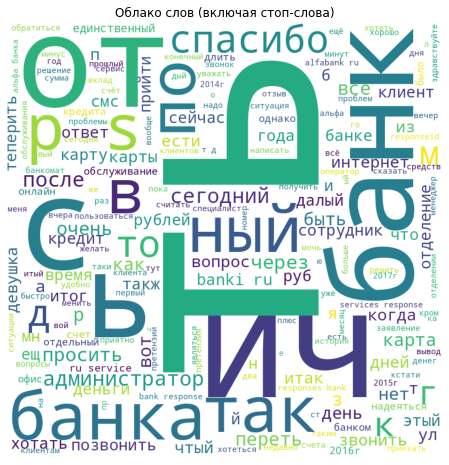

In [80]:
text = ' '.join(words)

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (включая стоп-слова)')
plt.show()